# Graphs to Construct:
- hp over time
- engine cylinders vs. hp
- time vs. highway MPG, city MPG
- time vs. #engine cylinder
- engine cylinders vs. MSRP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import the data
df = pd.read_csv('car_data.csv')

## <font color = 'blue'>Look at your data initially to see if the range of it</font>

In [3]:
# look at the data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## <font color = 'blue'> Ensure data frame as no missing value, names are callable, and the values make sense for each column</font>

In [5]:
# change the columns names so their easy to call
df.columns = [name.lower().replace(' ', '_') for name in (list(df.columns))]

In [6]:
df.head() # ensure the column names are lowercased and contain no spaces
df.shape #11,914 rows

(11914, 16)

In [7]:
# Check to see if years are consecutive
list_years = list(sorted(list(df['year'].unique())))
for index in range(0,(len(list_years))):
    try:
        if list_years[index+1] == (list_years[index] +1):
            print('Consecutive')
    except IndexError:
        break
# consecutive years


Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive
Consecutive


In [8]:
# check the columns of interest to see if there are missing values
df['year'].isna().sum() # 0
df['engine_hp'].isna().sum() # 69
df['engine_cylinders'].isna().sum() # 30
df['highway_mpg'].isna().sum() # 0
df['city_mpg'].isna().sum() # 0
df['msrp'].isna().sum() # 0


0

In [9]:
# Get rid of rows where there is a NaN value in the following columns
df = df.dropna(axis= 0, subset=['engine_hp','engine_cylinders'])
df.shape #11,816 rows

(11816, 16)

In [10]:
# check if the columns of interest have reasonable data
df['engine_hp'].describe() # this looks reasonable
df['engine_cylinders'].describe() # there is a min of 0 cylinders, which doesn't make sense
df['highway_mpg'].describe() # there is a max value of 354 miles per gallon, this doesn't necessarily make sense
df['city_mpg'].describe() # max 137, this doesn't make sense
df['msrp'].describe() # makes sense

# because there are values that seem extreme such as the MPG and engine cylinder count of 0, 
# I suspect there are electric vehicles in this data frame, so I'll be taking those out.
df['engine_fuel_type'].unique() # there are electric vehicles in this df. plot to see how much outliers will affect my data


array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'electric', 'natural gas',
       'flex-fuel (premium unleaded required/E85)', nan], dtype=object)

In [11]:
df = df[df.engine_fuel_type != 'electric']

In [12]:
df.shape

(11803, 16)

## <font color = 'blue'>OLS with Linear Algebra</font>

Our linear regression equation can be represented as:

$ y = Xb + error $

to begin with, we are going to assume that on average, the error is equal to 0. (We can assume this due our assumptions for linear algebra)

$ y = Xb  + 0 $ --> $ y = Xb $

We want to solve for b. That means we need to isolate it on one side of the equation therefore we can take the inverse of this function. Let's multily by the inverse. Let's calculate it:

$ X^{-1} $


We can only calculate an inverse of a square matrix. We can make accomplish this be multiplying the matrix by its transpose.

$X^{T} y = X^{T} X b $

Now we can take the inverse of the new square matrix $X^{T}X$ and multiply it to both sides to isolate with b vector

$ (X^{T}X)^{-1} X^{T}y = (X^{T}X)^{-1} (X^{T}X)b$ 
- <font color = 'blue'>**You have to multiply by the tranpose first to get a sqaure matrix to then multiply by the inverse, because as we know, a matrix, multiplied by its inverse is identity matrix. If you didn't take the transposition, you couldn't do X{T}X if your X wasn't sqaured to begin with**</font>

$(X^{T}X)^{-1}X^{T}y = I b$

We are left with the identity matrix multiplied by b, which is simply equal to b

$b = (X^{T}X)^{-1}X^{T}y  $

Now, solve for b!

In [13]:
y = df['msrp']
x_df = df[['engine_hp','engine_cylinders','highway_mpg', 'city_mpg']]

In [14]:
x_df['constant'] = 1

/Users/PB/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
x_matrix = x_df.values # put it in array/matrix form

In [16]:
x_transposed = x_matrix.T
xt_x = x_transposed.dot(x_matrix) # need to multiple by transpose to get a square matrix 
xt_x.shape # need square matrix to take inverse (5,5)
xtx_inv = np.linalg.inv(xt_x) # (5,5)
xtx_inv.shape
xty = x_transposed.dot(y)
xty.shape #(5,)
x_hat = xtx_inv.dot(xty) 
x_hat.shape # (5,)


(5,)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

skl_x = x_df.drop(columns = 'constant')
lr.fit(skl_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
np.round(lr.coef_,2)

array([ 327.47, 7997.16,  391.06, 1873.62])

In [19]:
np.round(lr.intercept_,2)

-132656.27

$$ MSRP = 327.47(hp) + 7997.16(cylinders) + 391.06(highwayMPG) + 1873.62(cityMPG) - 132656.27$$

In [20]:
lr.score(skl_x,y)

0.46430105834029933

#### <font color = 'blue'> The R-sqaured is 0.46, which is not good. So my linear regression model is not very predictive </font>

## <font color = 'blue'>Plot some features </font>

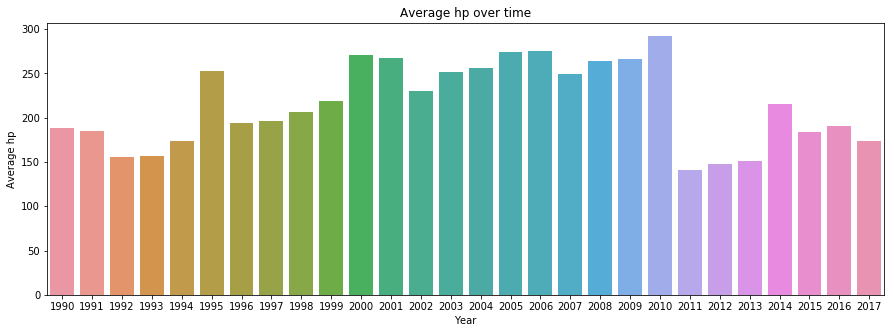

In [21]:
y_ = list((df.groupby('year').mean())['engine_hp']) # find the average hp for a given year
x_ = list(df['year'].unique())
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel('Year')
ax.set_ylabel('Average hp')
sns.barplot(ax= ax, x = x_, y = y_ ).set_title('Average hp over time');

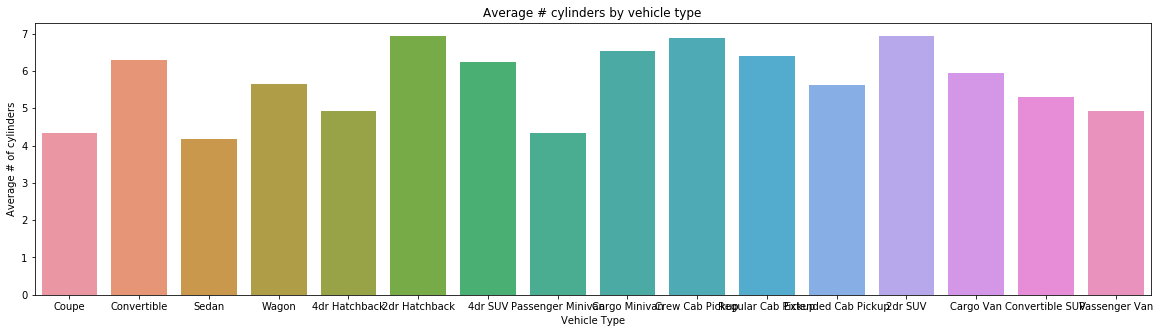

In [22]:
y_ = list((df.groupby('vehicle_style').mean())['engine_cylinders']) # find the average hp for a given year
x_ = list(df['vehicle_style'].unique())
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Average # of cylinders')
sns.barplot(ax= ax, x = x_, y = y_ ).set_title('Average # cylinders by vehicle type');

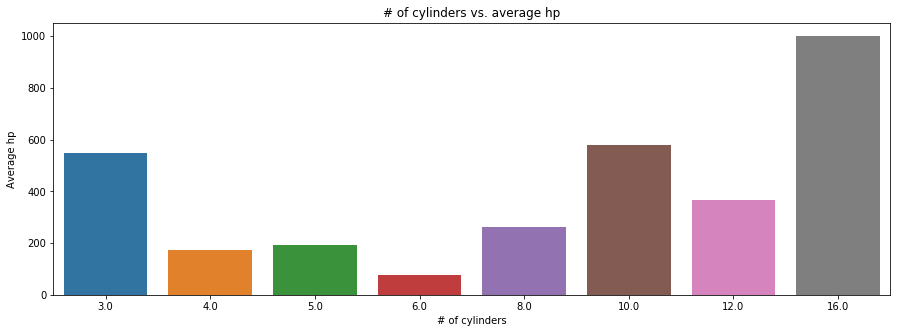

In [23]:
x_ = list(df['engine_cylinders'].unique())
y_ = list((df.groupby('engine_cylinders').mean())['engine_hp'])
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel('# of cylinders')
ax.set_ylabel('Average hp')
sns.barplot(ax= ax, x = x_, y = y_).set_title('# of cylinders vs. average hp');

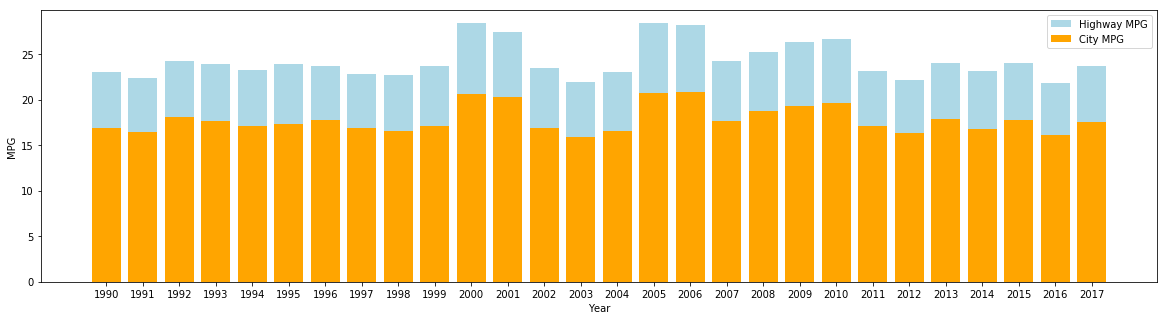

In [24]:
x_ = list(df['year'].unique())
y1_ = list((df.groupby('year').mean())['highway_mpg'])
y2_ = list((df.groupby('year').mean())['city_mpg'])
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(x_,y1_,color = 'lightblue');
plt.bar(x_,y2_, color = 'orange');
plt.xlabel('Year')
plt.ylabel('MPG')
plt.gca().legend(('Highway MPG','City MPG'))
plt.xticks(x_);

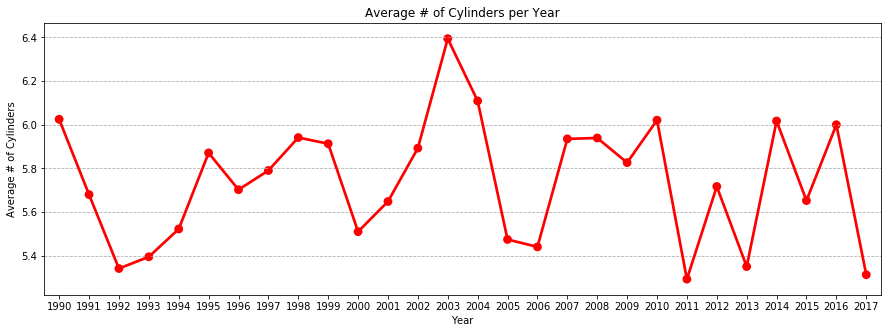

In [26]:
x_ = list(df['year'].unique())
y_ = list((df.groupby('year').mean())['engine_cylinders'])

fig, ax = plt.subplots(figsize=(15,5))
ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

plt.xlabel('Year')
plt.xticks(x_)
plt.ylabel('Average # of Cylinders')
sns.pointplot(x = x_, y = y_, color='red').set_title('Average # of Cylinders per Year');

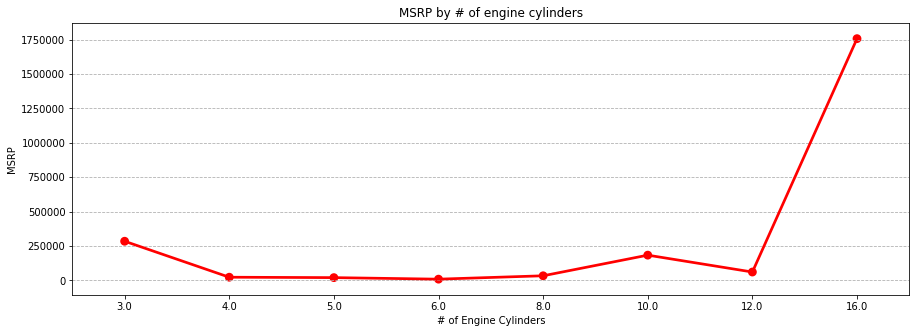

In [28]:
x_ = list(df['engine_cylinders'].unique())
y_ = list((df.groupby('engine_cylinders').mean())['msrp'])

fig, ax = plt.subplots(figsize=(15,5))
ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

plt.xlabel('# of Engine Cylinders')
plt.xticks(x_)
plt.ylabel('MSRP')
sns.pointplot(x = x_, y = y_, color='red').set_title('MSRP by # of engine cylinders');